# Machine Learning Modeling

## Objective
Build and evaluate a machine learning model to predict house sale prices.

## Modeling Results

- Gradient Boosting Regressor achieved an R² score of **0.89**
- Model demonstrates strong predictive capability
- Key drivers of house prices include Overall Quality, Living Area, and Garage Size
- Predictions closely align with actual sale prices

## Model Performance Visualization

The scatter plot compares actual house prices with predicted prices.

- Most predictions closely follow the ideal diagonal line.
- This indicates that the model has learned strong relationships between features and house prices.
- Some deviation exists for higher-priced properties, which is expected in real-world datasets.

Overall, the model demonstrates strong predictive accuracy.


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score


In [3]:
train_df = pd.read_csv("../data/processed/clean_train.csv")

train_df.head()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,6,150,0.0,548,2,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,4,978,5,284,0.0,460,2,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,920,866.0,3.0,2,486,6,434,0.0,608,2,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500
3,961,0.0,3.0,1,216,5,540,0.0,642,1,...,60.0,0.0,35,5,7,756,0.0,1915,1970,140000
4,1145,0.0,4.0,3,655,6,490,0.0,836,2,...,84.0,350.0,84,5,8,1145,0.0,2000,2000,250000


In [4]:
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

X.shape, y.shape


((1460, 23), (1460,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((1168, 23), (292, 23))

In [6]:
model = GradientBoostingRegressor(random_state=42)

model.fit(X_train, y_train)


,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [7]:
y_pred = model.predict(X_test)


In [8]:
score = r2_score(y_test, y_pred)

print("R² Score:", score)


R² Score: 0.8886191121839628


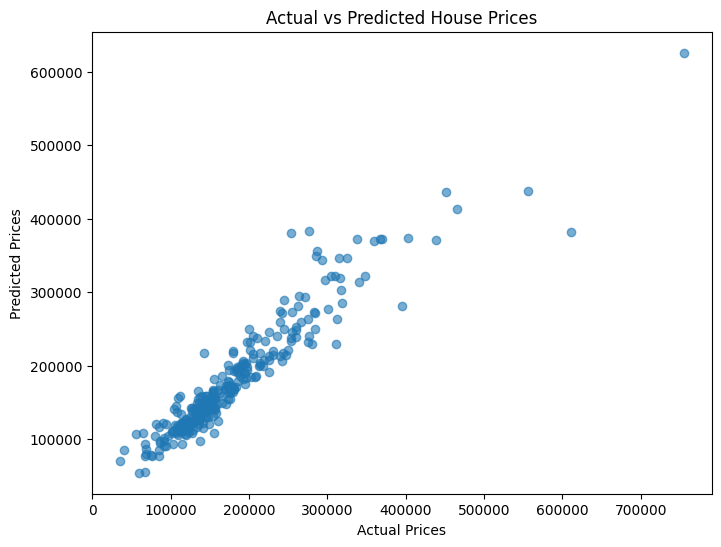

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.6)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.title("Actual vs Predicted House Prices")

plt.show()


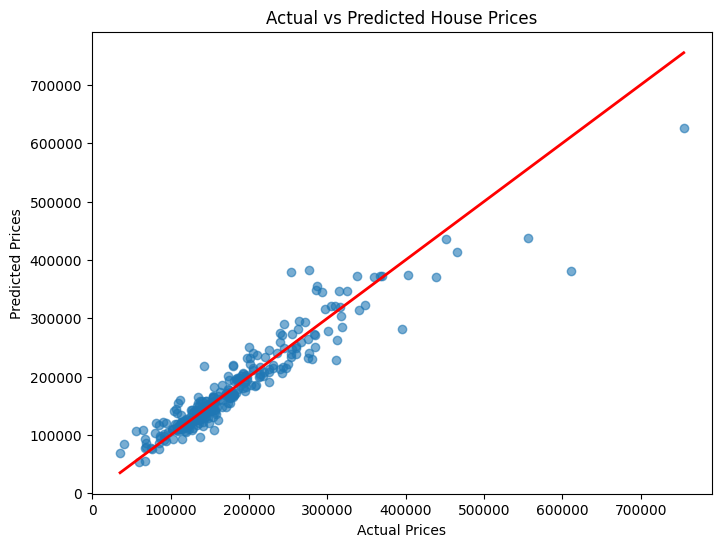

In [12]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.6)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linewidth=2
)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

plt.show()


In [10]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


OverallQual    0.520066
GrLivArea      0.154116
BsmtFinSF1     0.048768
TotalBsmtSF    0.045396
KitchenQual    0.035512
2ndFlrSF       0.034301
GarageArea     0.034177
YearBuilt      0.031292
1stFlrSF       0.029270
LotArea        0.023186
dtype: float64

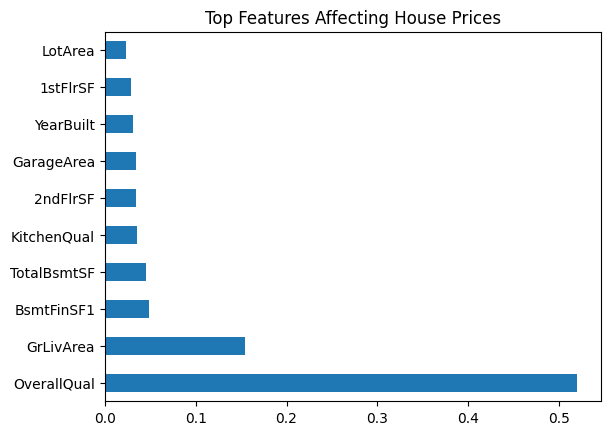

In [11]:
feature_importance.head(10).plot(kind="barh")

plt.title("Top Features Affecting House Prices")
plt.show()
